# Model Project: **Consumers Problem**

In [23]:
# We start by importing the relevant packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
import sympy as sm

For this assignment we consider a Micro Economics I problem with inspiration from the Winter 2016 exam (excercise 2) from the University of Copenhagen.

## Visualization of the Consumers Utility

The problem considers the consumer's utility of two goods:

\\[ u(x_1,x_2) = x_1 x_2 + 2 x_2 \\]

The consumption-possibility frontier is \\[(x_1,x_2) \in (0,\infty)\times(0,\infty)\\] Also, we assume that \\[p_1,p_2,I>0\\]

Firstly we visualize the consumer's utility to consider its properties

In [24]:
# We define the utility function
def u(x1,x2):
    u = x1*x2 + 2 * x2
    return u

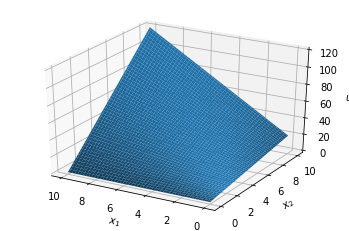

In [25]:
# We construct 2 vectors, x1 and x2, within the interval 0 to 10.
x1_vec = np.linspace(0,10,100)
x2_vec = np.linspace(0,10,100)

# We then construct a grid of the two vectors constructed above.
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec)

# Within this grid we consider the utility function
u_grid=u(x1_grid,x2_grid)

# We plot the graph 3d
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_grid,x2_grid,u_grid)

# Then we add labels and invert the axes
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')
ax.invert_xaxis()

## Solving the Consumer's Utility Maximization Problem

We consider the following utility maximization problem: 

\\[ 
\begin{eqnarray*}
\max_{x_{1},x_{2}} x_{1} x_{2} + 2 x_{2}\ \text{u.b.}\ p_{1} x_{1} + p_{2} x_{2} = I
\end{eqnarray*}
\\]  

We define our utility and budget constraint in terms of sympy such that we can computate symbolic expressions with the variables in question.

In [26]:
# Converting the variables into symbolic expression
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I  = sm.symbols('I')
U = sm.symbols('U')

# Construction the utility function and budget constraint in terms of symbolic expressions
utility = sm.Eq(x1*x2 + 2*x2, U)
budget_constraint = sm.Eq(p1*x1 + p2*x2, I)

We wish to find the consumers demand for $x_1$ and $x_2$ respectivly. First we isolate $x_2$

In [27]:
# Isolate x2 withinthe budget constraint
x2constraint = sm.solve(budget_constraint, x2)

\\[x_2 = \frac{I - p_1 x_1}{p_2}\\]

Then we substitute our result for $x_2$ into the the utility function

In [28]:
utility_subx2 = utility.subs(x2, x2constraint[0])


\\[u =  \frac{x_1(I - p_1 x_1)}{p_2} + \frac{2(I - p_1 x_1)}{p_2}\\]

Now we are able to maximize this equation by finding the deriviate with respect to $x_1$

In [29]:
focx1 = sm.diff(utility_subx2, x1)

\\[\text{FOC(1) = } -\frac{p_1 x_1}{p_2} - \frac{2 p_1}{p_2} + \frac{I - p_1 x_1}{p_2}\\]

We set this equal to zero and solve for $x_1$

In [30]:
x1sol = sm.solve(sm.Eq(focx1, 0), x1)

\\[x_1 = \frac{I - 2 p_1}{2 p_1}\\]

We substitute the result above for $x_1$ into our budget constraint expressed as a function for $x_2$

In [31]:
x1constraint = sm.solve(budget_constraint, x1)
utility_subx1 = utility.subs(x1, x1constraint[0])
focx2 = sm.diff(utility_subx1, x2)
x2sol = sm.solve(sm.Eq(focx2, 0), x2)

\\[x_2 = \frac{I + 2 p_1}{2 p_2}\\]

We choose to disregard the corner solution in the this case

## A Specific Case

We let prices $p_1 = 4$ and $p_2 = 1$ and $I = 16$. Due to a change in circumstances for the production of the two goods, a fall in the price of good 1 falls to $p_1 = 1$

In [32]:
# We define the result above for x1 and x2 in terms of functions instead of symbolic expressions

def x2func(p1,p2,I):
    return (I/2 + p1)/p2

def x1func(p1,p2,I):
    return (I/2 - p1)/p1

In [33]:
# We consider x1 and x2 for the case of p1=4, p2=1 and I=16
print('x2 =',x2func(4,1,16))
print('x1 =',x1func(4,1,16))
print('utility =', u(x1func(4,1,16),x2func(4,1,16)))

x2 = 12.0
x1 = 1.0
utility = 36.0


In [34]:
# We then consider x1 and x2 for the case of p1=1, p2=1 and I=16
print('x2 =',x2func(1,1,16))
print('x1 =',x1func(1,1,16))
print('utility =', u(x1func(1,1,16),x2func(1,1,16)))

x2 = 9.0
x1 = 7.0
utility = 81.0


We show the two results this graphically

In [35]:
# We isolate x2 in the utility function and budget constraint such that we are able to plot it in the same graph

# We find the budget constraint in terms of x2 (as we also found earlier)
print(sm.solve(budget_constraint, x2))

# We perform the same computation for the utility function
print(sm.solve(utility, x2))

[(I - p_1*x_1)/p_2]
[U/(x_1 + 2)]


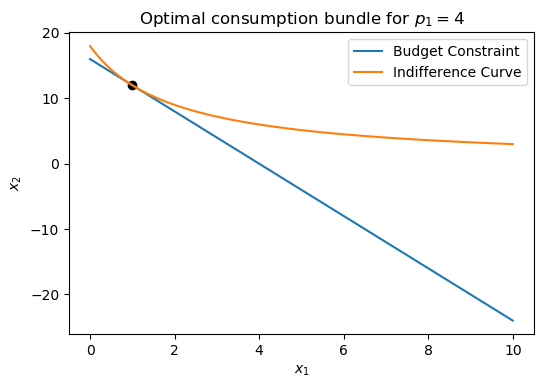

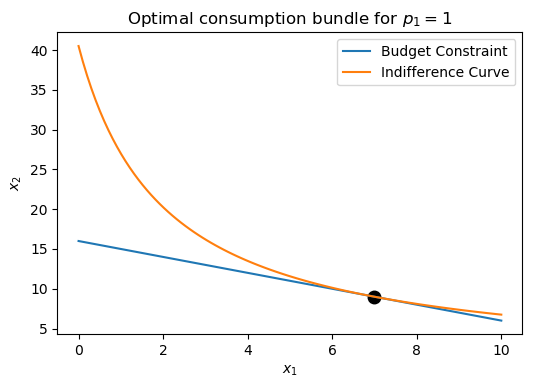

In [47]:
# We define the indifference curve and budget constraint in terms of x2 as foundd above
def budget(x1,I,p1,p2):
    return (I-p1*x1)/p2

def indiff(x1,u,p1,p2):
    return u/(x1+2)

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,budget(x1_vec,16,4,1),label='Budget Constraint')
ax.plot(x1_vec,indiff(x1_vec,36,4,1),label='Indifference Curve')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.scatter(x1func(4,1,16),x2func(4,1,16),u(x1func(4,1,16),x2func(4,1,16)),color='black')
plt.title('Optimal consumption bundle for $p_1=4$')
ax.legend();

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,budget(x1_vec,16,1,1),label='Budget Constraint')
ax.plot(x1_vec,indiff(x1_vec,81,1,1),label='Indifference Curve')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.scatter(x1func(1,1,16),x2func(1,1,16),u(x1func(1,1,16),x2func(1,1,16)),color='black')
plt.title('Optimal consumption bundle for $p_1=1$')
ax.legend();

## Interactive

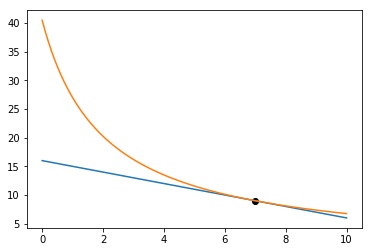

In [20]:
I_plot = 16
p1_plot = 4 
p2_plot = 1 
u_plot = 81

def budget(x1,I_plot,p1_plot,p2_plot):
    return (I_plot-p1_plot*x1)/p2_plot

def indiff(x1,u_plot,p1_plot,p2_plot):
    return u_plot/(x1+2)

def _figure(x1, I_plot, p2_plot, p1_plot):
    plt.figure()
    plt.plot(x1_vec,budget(x1_vec,I_plot,p1_plot,p2_plot))
    plt.plot(x1_vec,indiff(x1_vec,u_plot,p1_plot,p2_plot))
    plt.scatter(x1func(p1_plot,p2_plot,I_plot),
                x2func(p1_plot,p2_plot, I_plot),color='black')


import ipywidgets as widgets
widgets.interact(_figure, 
                x1=widgets.fixed(x1_vec), 
                I_plot=widgets.FloatSlider(description="I", min=0, max=100, step=0.05, value=16),
                p2_plot=widgets.FloatSlider(description="p2", min=0, max=20, step=0.05, value=1),
                p1_plot=widgets.FloatSlider(description="p1", min=0, max=20, step=0.05, value=1));

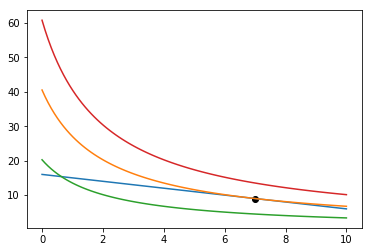

In [21]:
I = 16
p1 = 4 
p2 = 1 

def budget(x1,I,p1,p2):
    return (I-p1*x1)/p2

def indiff(x1,u_test,p1,p2):
    return u_test/(x1+2)

def _figure(x1_vec, I, p2, p1):
    plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.plot(x1_vec,budget(x1_vec,I,p1,p2))
    x1 = x1func(p1,p2,I)
    x2 = x2func(p1,p2,I)    
    u_plot = x1*x2 + 2*x2
    plt.plot(x1_vec,indiff(x1_vec,u_plot,p1,p2))
    plt.plot(x1_vec,indiff(x1_vec,u_plot*0.5,p1,p2))
    plt.plot(x1_vec,indiff(x1_vec,u_plot*1.5,p1,p2))
    plt.scatter(x1,x2,color='black')


import ipywidgets as widgets
widgets.interact(_figure, 
                x1_vec = widgets.fixed(x1_vec), 
                I = widgets.FloatSlider(description="I", min=0, max=100, step=0.05, value=16),
                p2 = widgets.FloatSlider(description="p2", min=0, max=20, step=0.05, value=1),
                p1 = widgets.FloatSlider(description="p1", min=0, max=20, step=0.05, value=1));

## Alternative Solution by Numerical Analysis

In [91]:
I = 16
p1 = 1
p2 = 1

def u_func(x1,x2):
    return x1*x2+2*x2

def value_of_choice(x,I,p1,p2):
    x1 = x[0]
    x2 = x[1]
    return -u_func(x1,x2)

constraints = (
    {'type': 'ineq', 'fun': lambda x:  I-p1*x[0]-p2*x[1]}   
)
bounds = (
    (0,(I-2*p1)/2*p1),
    (0,(I-2*p1)/2*p2)
)

# c. call solver
initial_guess = [I/p1,I/p2]
sol_case2 = optimize.minimize(
    value_of_choice,initial_guess,args=(I,p1,p2),
    method='SLSQP',bounds=bounds,constraints=constraints)

# d. unpack solution
x1 = sol_case2.x[0]
x2 = sol_case2.x[1]
u = u_func(x1,x2)

def print_solution(x1,x2,u,I,p1,p2):
    print(f'x1 = {x1:.8f}')
    print(f'x2 = {x2:.8f}')
    print(f'u  = {u:.8f}')
    print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.8f}') 
    


In [92]:
print_solution(x1,x2,u,I,p1,p2)

x1 = 7.00000000
x2 = 7.00000000
u  = 63.00000000
I-p1*x1-p2*x2 = 2.00000000
